In [1]:
using BasisFunctions
using FrameFuns
using Plots
gr()

Plots.GRBackend()

### One-Dimensional Adaptive Approximation

#### Intervals

In [1]:
D = Interval(-0.5,0.5)

the interval [-0.5, 0.5]

#### Spaces

In [33]:
F = FourierSpace(-1,1)
C = ChebyshevSpace()
FunctionSet(F,4)

BasisFunctions.LinearMappedSet{BasisFunctions.FourierBasis{true,Complex{Float64}},Int64,Complex{Float64}}(BasisFunctions.FourierBasis{true,Complex{Float64}}(4),-1,1)

#### Functions

In [3]:
f1 =(x)->cos(3*x)
f2 =(x)->cos(80*x)
f3(x) = cos(10*x.^2)

f3 (generic function with 1 method)

#### Constructors

In [11]:
FC1 = FunConstructor(F, D)
F1 = FC1(f1)

Error with 16 coefficients is 2.631e-08
Error with 32 coefficients is 3.046e-13


A 1-dimensional FrameFun with 32 degrees of freedom.
Basis: Fourier series, mapped to [ -1  ,  1 ]
Domain: the interval [-0.5, 0.5]


In [6]:
plot(F1,f1)

ErrorException: At least one finite value must be provided to formatter.

In [7]:
FC2 = FunConstructor(C, Interval()/2)
F2 = FC2(f2)

Error with 16 coefficients is 2.500e+01
Error with 32 coefficients is 3.165e+00
Error with 64 coefficients is 7.251e-02
Error with 128 coefficients is 4.392e-13


A 1-dimensional FrameFun with 128 degrees of freedom.
Basis: Chebyshev series (first kind)
Domain: the interval [-0.5, 0.5]


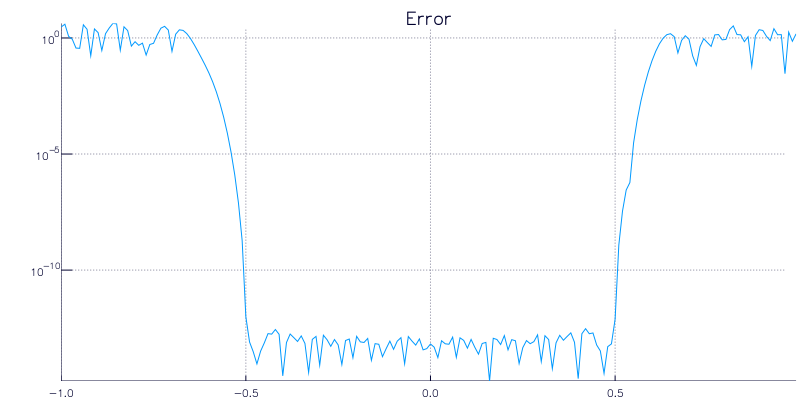

In [8]:
plot(F2,f2)

In [4]:
FC3 = FunConstructor(F, Interval(-1.0,-0.5)+Interval(-0.2,0.5))
F3 = FC3(f3)

Error with 16 coefficients is 1.192e-02
Error with 32 coefficients is 5.152e-05
Error with 64 coefficients is 3.959e-10
Error with 128 coefficients is 1.591e-07
Error with 256 coefficients is 7.826e-07


A 1-dimensional FrameFun with 256 degrees of freedom.
Basis: Fourier series, mapped to [ -1  ,  1 ]
Domain: a union of two domains: 
    First domain: the interval [-1.0, -0.5]
    Second domain: the interval [-0.2, 0.5]



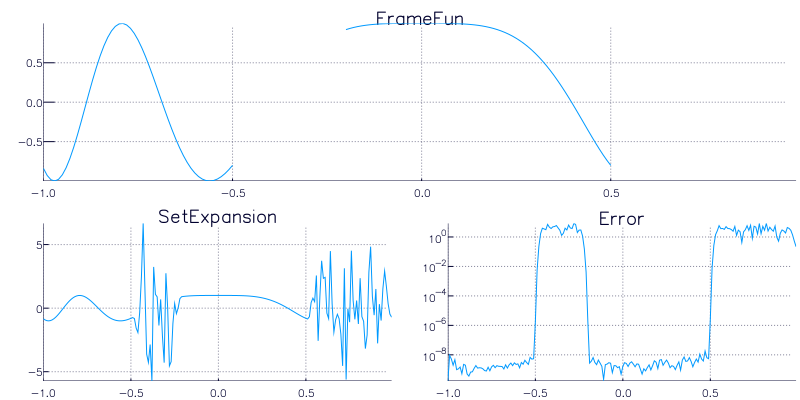

In [5]:
l = @layout [Plots.grid(1,1); Plots.grid(1,2)]
plot(F3, layout=l)
plot!(F3, subplot=2, plot_ext=true)
plot!(F3,f3, subplot=3)

#### Extra functionality

In [12]:
x = FC1(identity)

Error with 16 coefficients is 9.580e-06
Error with 32 coefficients is 7.102e-11
Error with 64 coefficients is 3.927e-13


A 1-dimensional FrameFun with 64 degrees of freedom.
Basis: Fourier series, mapped to [ -1  ,  1 ]
Domain: the interval [-0.5, 0.5]


In [13]:
f4(x) = sin(cos(x))
F4 = sin(cos(x))

Error with 16 coefficients is 3.939e-08
Error with 32 coefficients is 8.565e-14


Error with 16 coefficients is 2.457e-08
Error with 32 coefficients is 2.453e-14


A 1-dimensional FrameFun with 32 degrees of freedom.
Basis: Fourier series, mapped to [ -1  ,  1 ]
Domain: the interval [-0.5, 0.5]


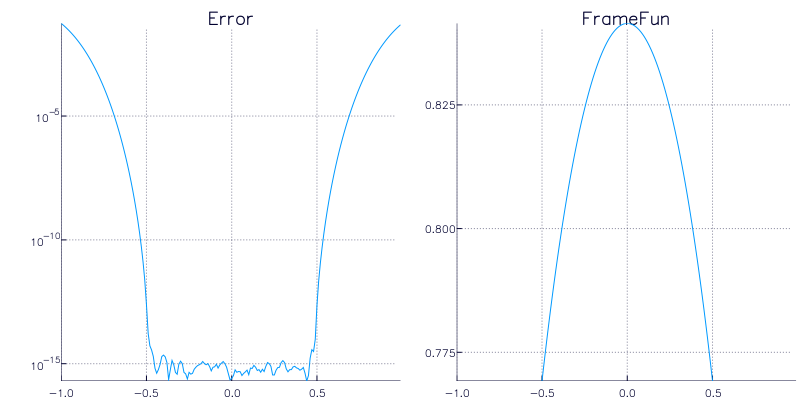

In [14]:
plot(F4,f4;layout=2)
plot!(F4;subplot=2)

In [15]:
f5(x) = exp(cos(100x))
F5 = exp(cos(100x); max_logn_coefs=10)

Error with 16 coefficients is 1.670e+01
Error with 32 coefficients is 2.966e+02


Error with 64 coefficients is 3.224e-06
Error with 128 coefficients is 3.970e-11
Error with 256 coefficients is 3.767e-11


Error with 16 coefficients is 1.372e+01
Error with 32 coefficients is 1.038e+02
Error with 64 coefficients is 2.075e+01
Error with 128 coefficients is 5.942e-01
Error with 256 coefficients is 8.030e-04
Error with 512 coefficients is 1.334e-08
Error with 1024 coefficients is 5.273e-13


A 1-dimensional FrameFun with 1024 degrees of freedom.
Basis: Fourier series, mapped to [ -1  ,  1 ]
Domain: the interval [-0.5, 0.5]


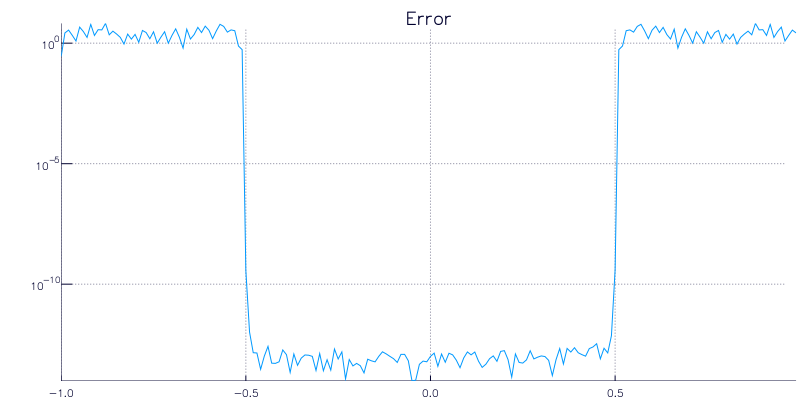

In [16]:
plot(F5,f5)

### 2D approximations

In [30]:
D = Cube([0,0],[0.5,0.5])
FF = FourierSpace()⊗FourierSpace()
f(x,y) = exp(y*2*x)
FC = FunConstructor(FF, D)

FrameFuns.FunConstructor{2,Complex{Float64}}(FrameFuns.FunctionSpace{2,Complex{Float64}}(BasisFunctions.TensorProductSet{Tuple{BasisFunctions.FourierBasis{true,Complex{Float64}},BasisFunctions.FourierBasis{true,Complex{Float64}}},2,Complex{Float64}}((BasisFunctions.FourierBasis{true,Complex{Float64}}(0),BasisFunctions.FourierBasis{true,Complex{Float64}}(0)))),the interval [0.0, 0.5] x the interval [0.0, 0.5])

In [34]:
F = FC(f,tol=1e-12)

Error with 16 coefficients is 1.196e-06
Error with 32 coefficients is 8.375e-10
Error with 64 coefficients is 6.413e-01
Error with 128 coefficients is 7.076e-09
Error with 256 coefficients is 2.349e-08


A 2-dimensional FrameFun with 65536 degrees of freedom.
Basis: tensor product (Fourier series x Fourier series)
Domain: the interval [0.0, 0.5] x the interval [0.0, 0.5]


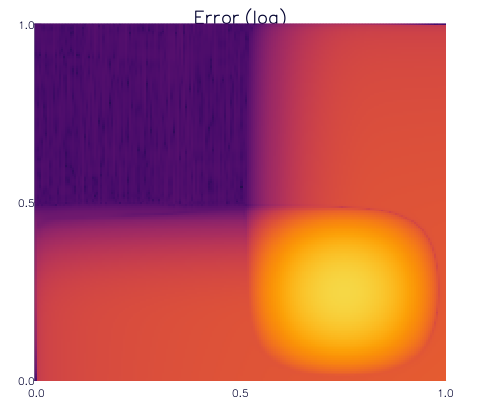

In [32]:
plot(F,f)